# SCATTER  PLOTS

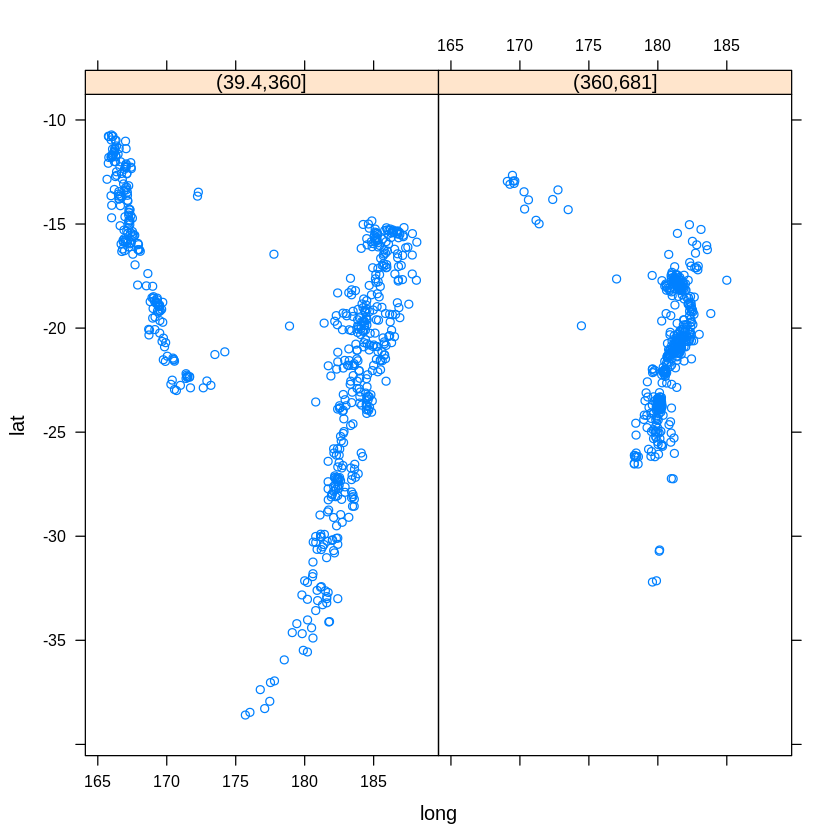

In [1]:
library("lattice")

xyplot(lat ~ long | cut(depth, 2), data = quakes)

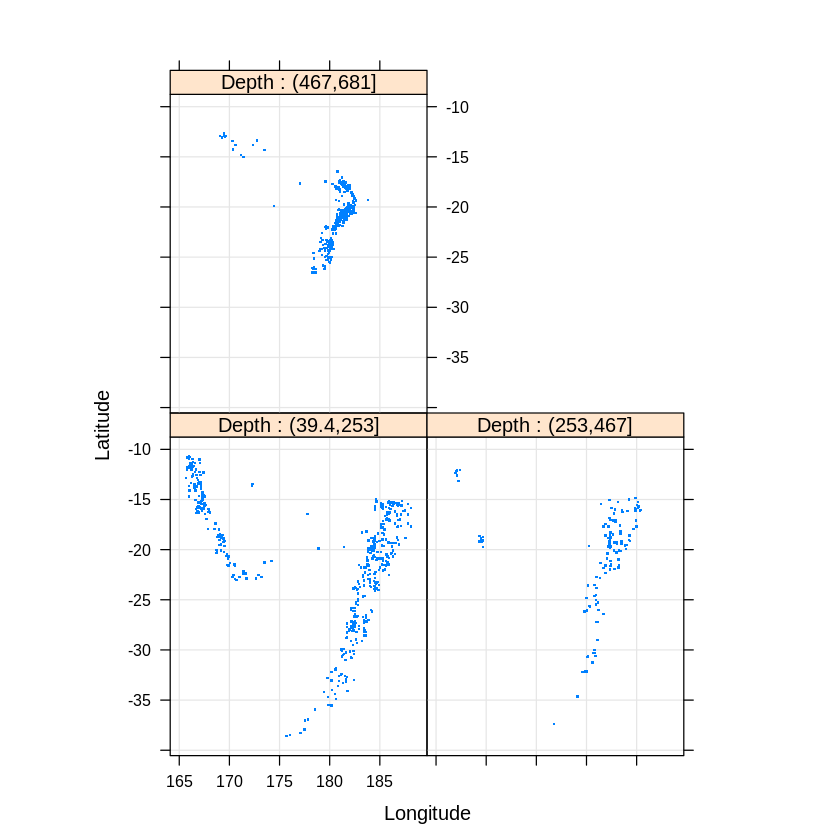

In [2]:
xyplot(lat ~ long | cut(depth, 3), data = quakes, 
       aspect = "iso", pch = ".", cex = 2, type = c("p", "g"),
       xlab = "Longitude", ylab = "Latitude", 
       strip = strip.custom(strip.names = TRUE, var.name = "Depth"))

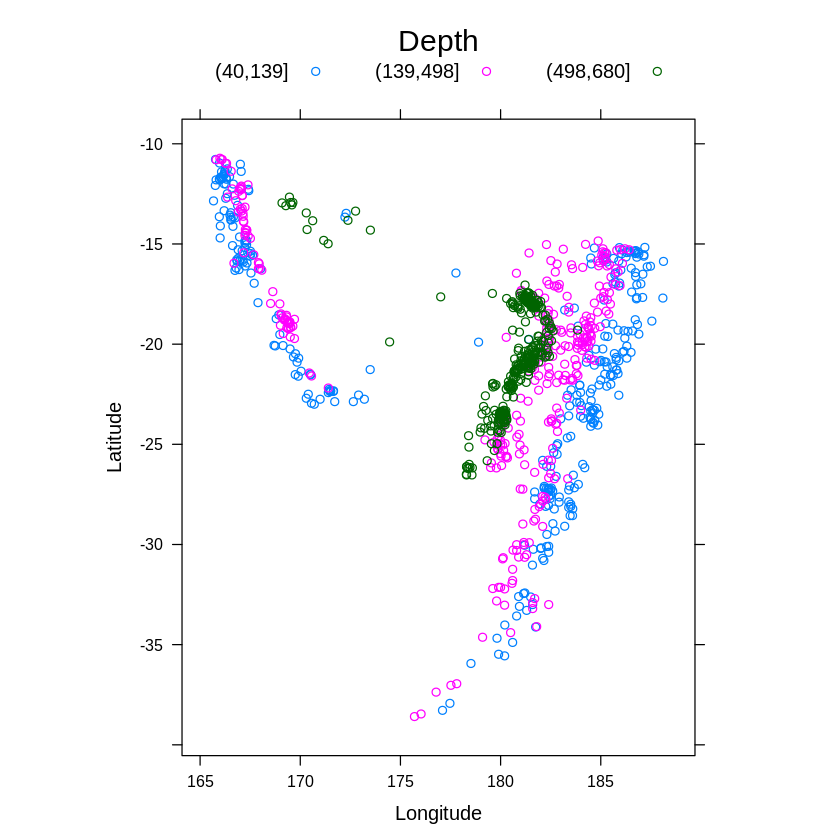

In [3]:
xyplot(lat ~ long, data = quakes, aspect = "iso",
       groups = cut(depth, breaks = quantile(depth, ppoints(4, 1))), 
       auto.key = list(columns = 3, title = "Depth"), 
       xlab = "Longitude", ylab = "Latitude")

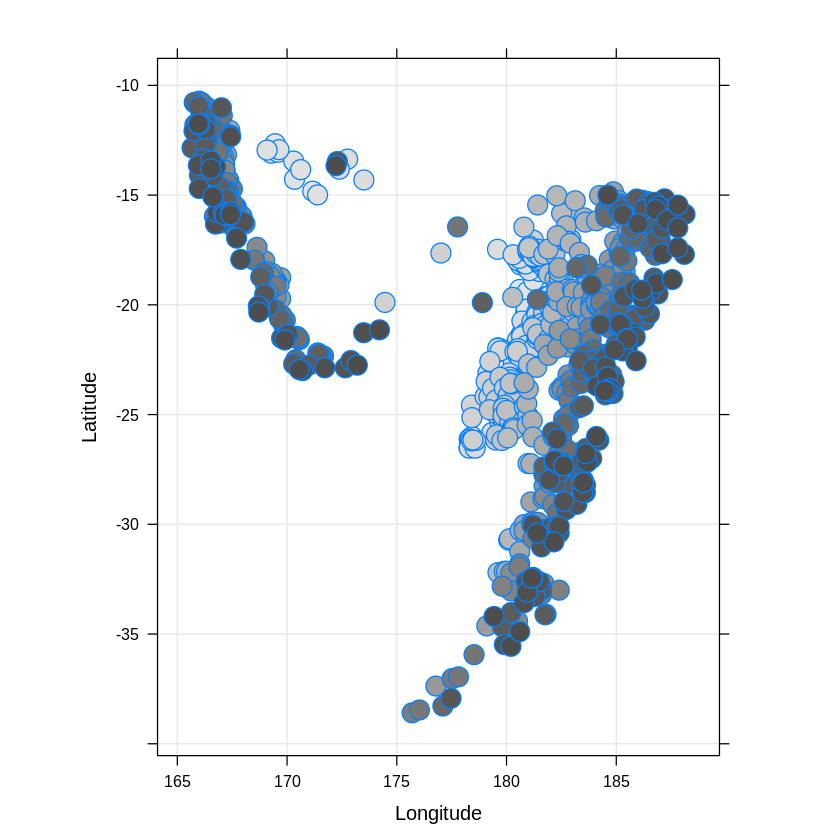

In [4]:
depth.col <- gray.colors(100)[cut(quakes$depth, 100, label = FALSE)]

depth.ord <- rev(order(quakes$depth))

xyplot(lat ~ long, data = quakes[depth.ord, ], 
       aspect = "iso", type = c("p", "g"),
       pch = 21, fill = depth.col[depth.ord], cex = 2,
       xlab = "Longitude", ylab = "Latitude")


Intervals:
   min  max count
1 3.95 4.55   484
2 4.25 4.75   492
3 4.45 4.95   425
4 4.65 6.45   415

Overlap between adjacent intervals:
[1] 293 306 217


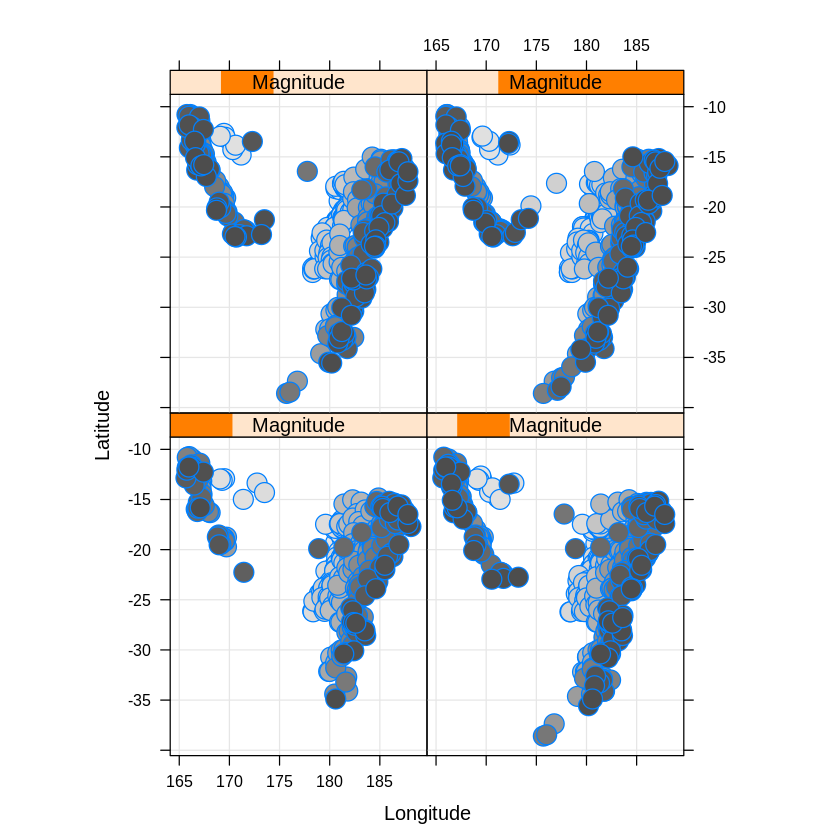

In [5]:
quakes$Magnitude <- equal.count(quakes$mag, 4)

summary(quakes$Magnitude)

quakes$color <- depth.col

quakes.ordered <- quakes[depth.ord, ]

xyplot(lat ~ long | Magnitude, data = quakes.ordered,
       aspect = "iso", fill.color = quakes.ordered$color, cex = 2,
       panel = function(x, y, fill.color, ..., subscripts) {
           fill <- fill.color[subscripts]
           panel.grid(h = -1, v = -1)
           panel.xyplot(x, y, pch = 21, fill = fill, ...)
       },
       xlab = "Longitude", ylab = "Latitude")

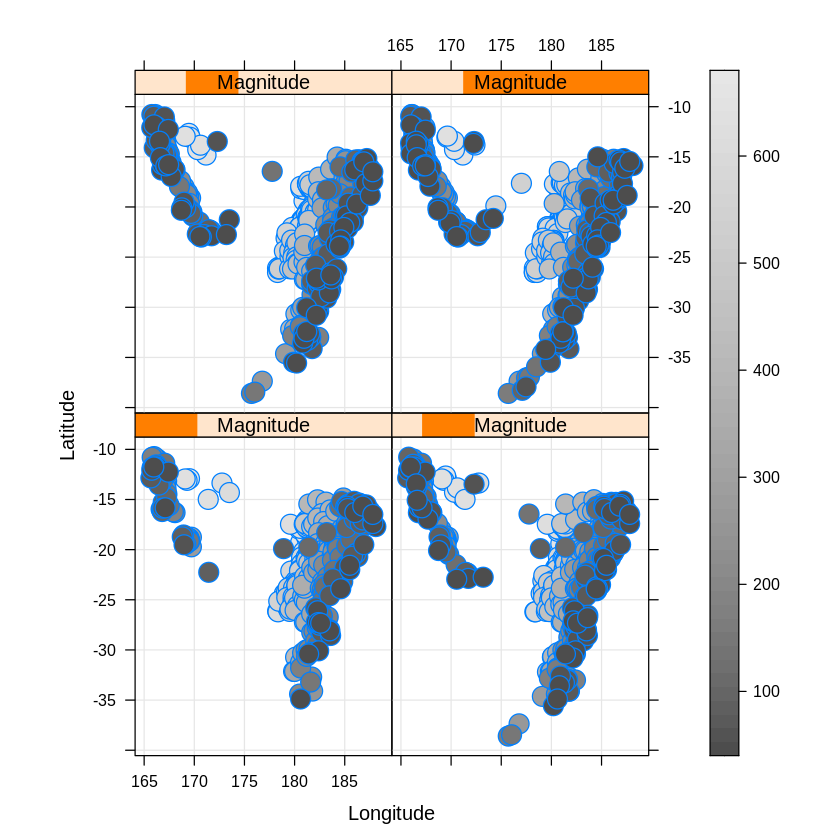

In [6]:
depth.breaks <- do.breaks(range(quakes.ordered$depth), 50)

quakes.ordered$color <- 
    level.colors(quakes.ordered$depth, at = depth.breaks, 
                 col.regions = gray.colors)
                 
xyplot(lat ~ long | Magnitude, data = quakes.ordered, 
       aspect = "iso", groups = color, cex = 2,
       panel = function(x, y, groups, ..., subscripts) {
           fill <- groups[subscripts]
           panel.grid(h = -1, v = -1)
           panel.xyplot(x, y, pch = 21, fill = fill, ...)
       },
       legend = 
       list(right = 
            list(fun = draw.colorkey,
                 args = list(key = list(col = gray.colors,
                                        at = depth.breaks), 
                             draw = FALSE))),
       xlab = "Longitude", ylab = "Latitude")

Loading required package: grid



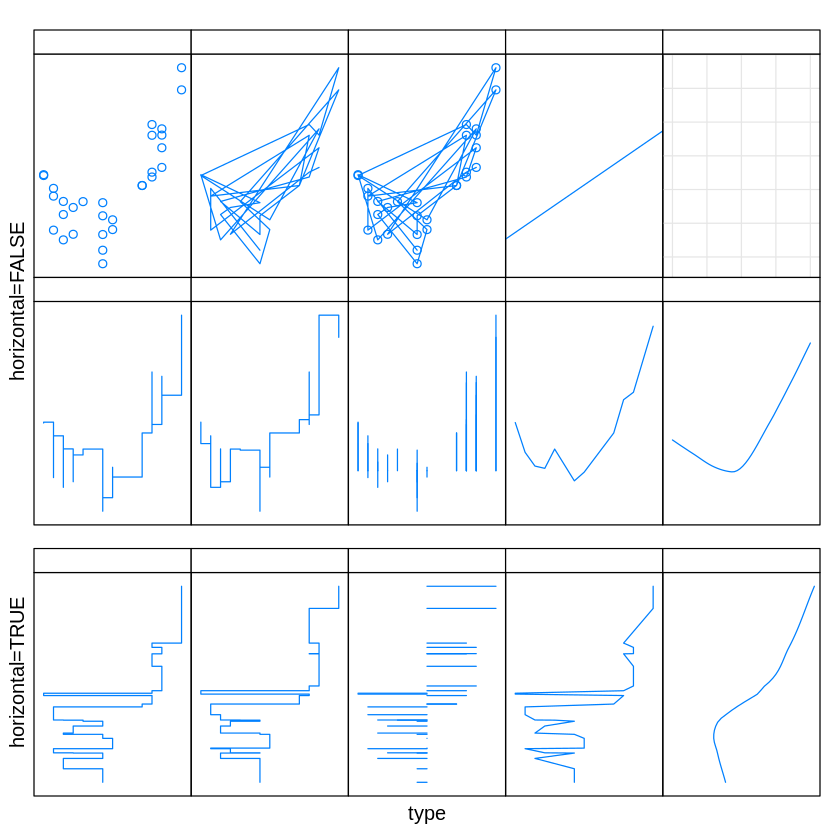

In [7]:
types.plain <- c("p", "l", "o", "r", "g", "s", "S", "h", "a", "smooth")

types.horiz <- c("s", "S", "h", "a", "smooth")

horiz <- rep(c(FALSE, TRUE), c(length(types.plain), length(types.horiz)))

types <- c(types.plain, types.horiz)

set.seed(2007041)

x <- sample(seq(-10, 10, length = 15), 30, TRUE)

y <- x + 0.25 * (x + 1)^2 + rnorm(length(x), sd = 5)

xyplot(y ~ x | gl(1, length(types)),
       xlab = "type", 
       ylab = list(c("horizontal=TRUE", "horizontal=FALSE"), y = c(1/6, 4/6)),
       as.table = TRUE, layout = c(5, 3),
       between = list(y = c(0, 1)),
       strip = function(...) {
           require(grid)
           panel.fill(trellis.par.get("strip.background")$col[1])
           type <- types[panel.number()]
           grid.text(lab = sprintf('"%s"', type), 
                     x = 0.5, y = 0.5)
           grid.rect()
       },
       scales = list(alternating = c(0, 2), tck = c(0, 0.7), draw = FALSE),
       par.settings = 
       list(layout.widths = list(strip.left = c(1, 0, 0, 0, 0))),
       panel = function(...) {
           type <- types[panel.number()]
           horizontal <- horiz[panel.number()]
           panel.xyplot(..., 
                        type = type,
                        horizontal = horizontal)
       })[rep(1, length(types))]

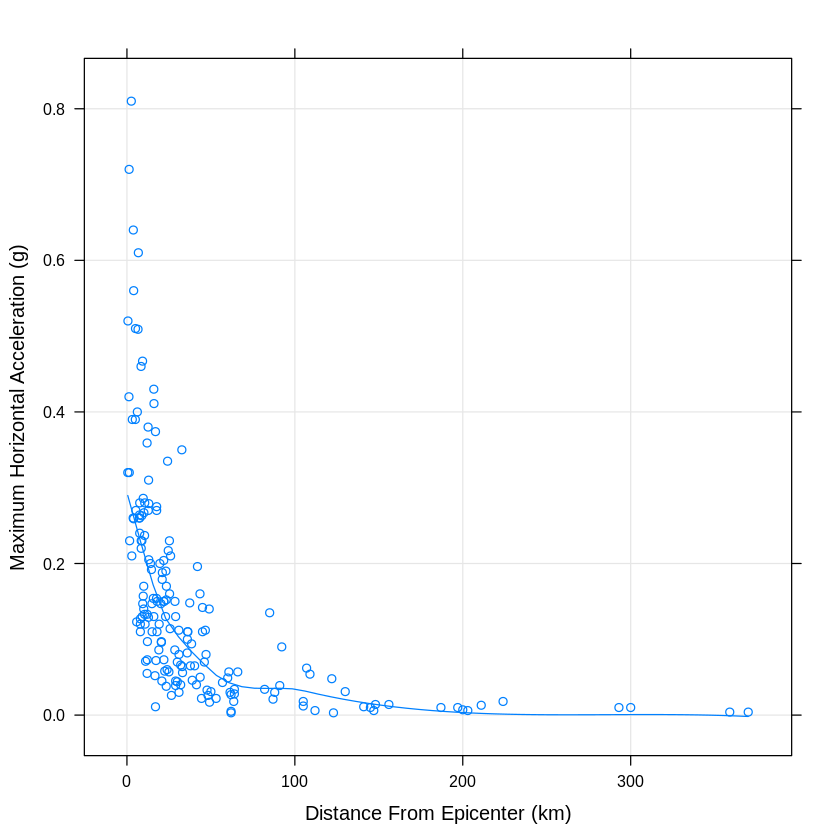

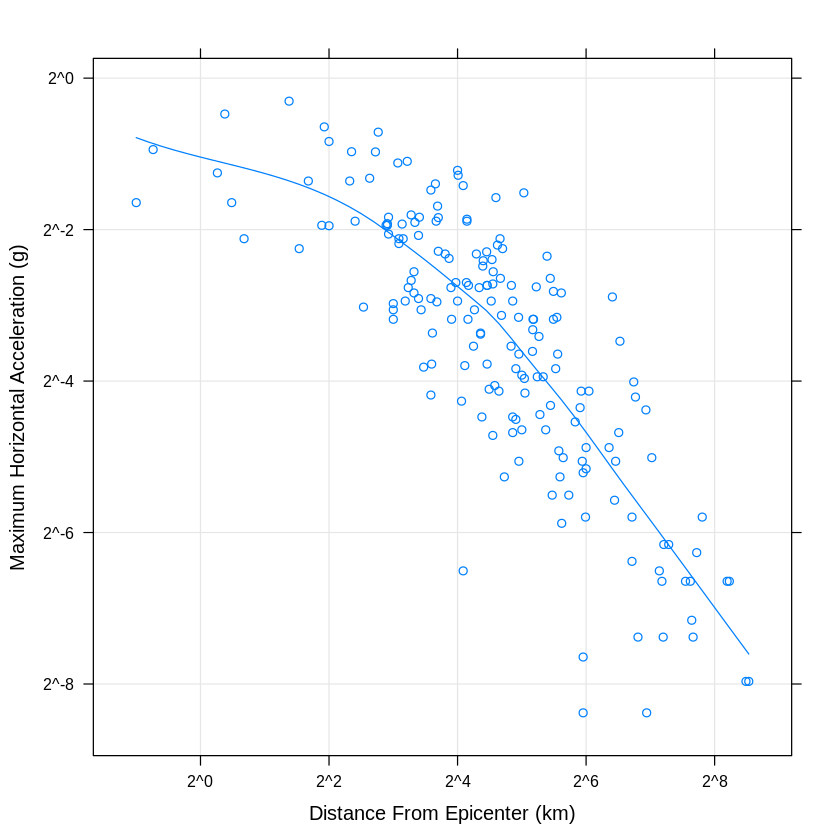

In [8]:
data(Earthquake, package = "MEMSS")

xyplot(accel ~ distance, data = Earthquake,
       panel = function(...) {
           panel.grid(h = -1, v = -1)
           panel.xyplot(...)
           panel.loess(...)
       }, 
       xlab = "Distance From Epicenter (km)",
       ylab = "Maximum Horizontal Acceleration (g)")
xyplot(accel ~ distance, data = Earthquake,
       type = c("g", "p", "smooth"),
       scales = list(log = 2),
       xlab = "Distance From Epicenter (km)",
       ylab = "Maximum Horizontal Acceleration (g)")

locfit 1.5-9.1 	 2013-03-22



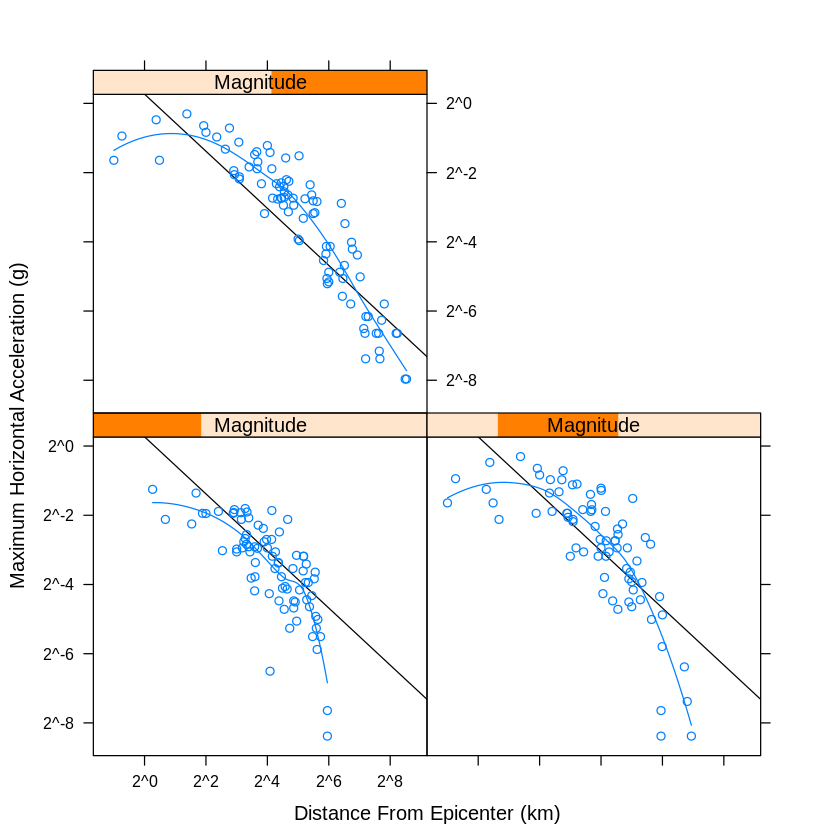

In [9]:
library("locfit")

Earthquake$Magnitude <- 
    equal.count(Earthquake$Richter, 3, overlap = 0.1)
coef <- coef(lm(log2(accel) ~ log2(distance), data = Earthquake))

xyplot(accel ~ distance | Magnitude, data = Earthquake,
       scales = list(log = 2), col.line = "grey", lwd = 2,
       panel = function(...) {
           panel.abline(reg = coef)
           panel.locfit(...)
       },
       xlab = "Distance From Epicenter (km)",
       ylab = "Maximum Horizontal Acceleration (g)")

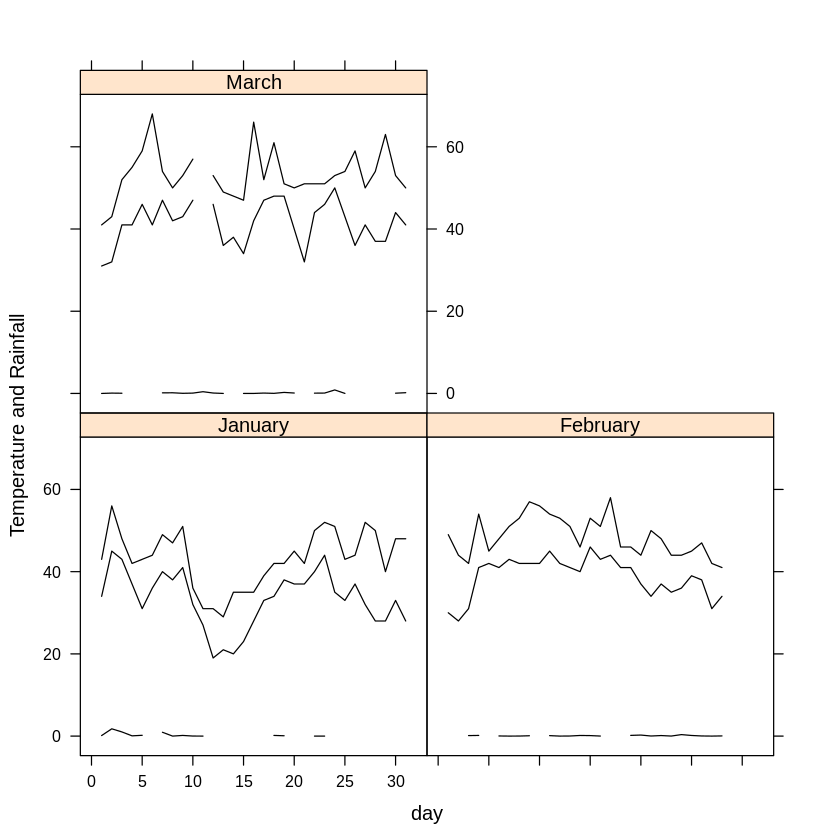

In [10]:
data(SeatacWeather, package = "latticeExtra")

xyplot(min.temp + max.temp + precip ~ day | month,
       ylab = "Temperature and Rainfall", 
       data = SeatacWeather, type = "l", lty = 1, col = "black")

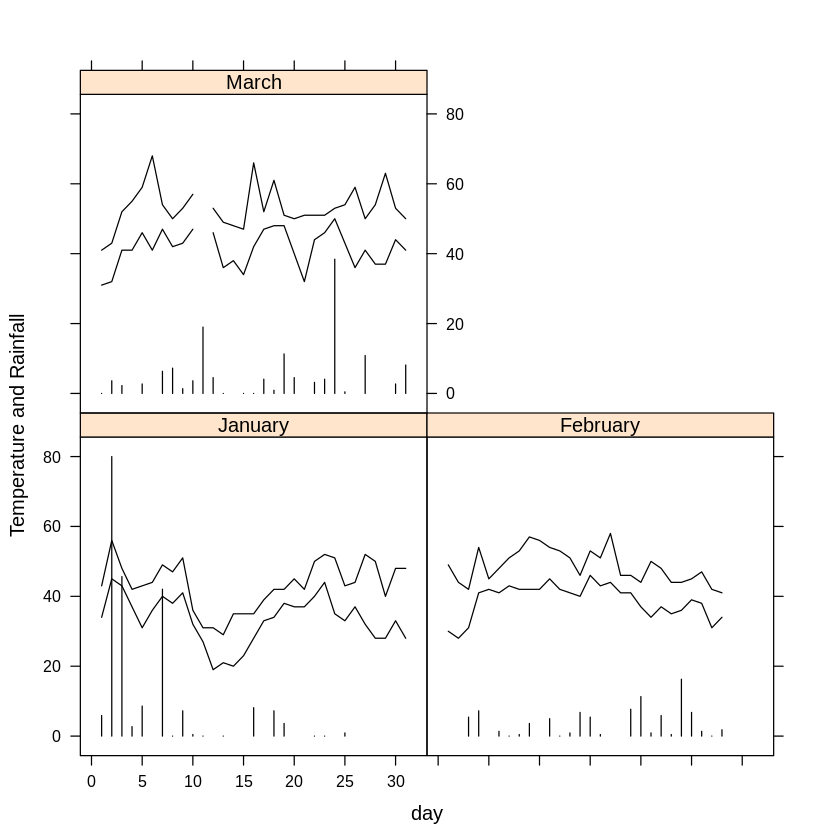

In [11]:
maxp <- max(SeatacWeather$precip, na.rm = TRUE)

xyplot(min.temp + max.temp + I(80 * precip / maxp) ~ day | month,
       data = SeatacWeather, lty = 1, col = "black",
       ylab = "Temperature and Rainfall", 
       type = c("l", "l", "h"), distribute.type = TRUE)

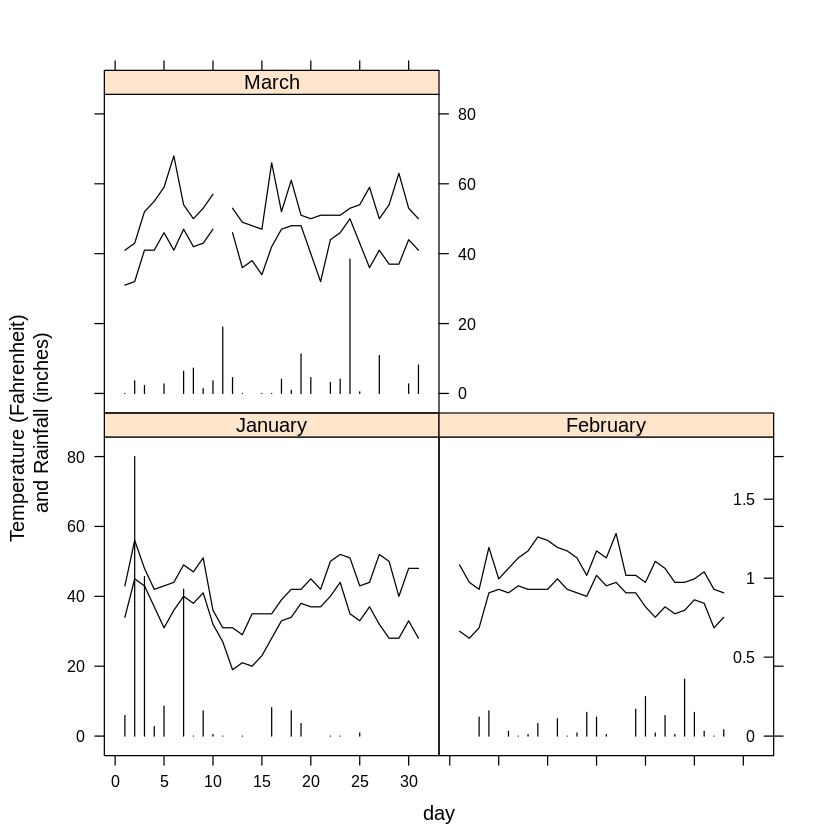

In [12]:
update(trellis.last.object(),
       ylab = "Temperature (Fahrenheit) \n and Rainfall (inches)",
       panel = function(...) {
           panel.xyplot(...)
           if (panel.number() == 2) {
               at <- pretty(c(0, maxp))
               panel.axis("right", half = FALSE,
                          at = at * 80 / maxp, labels = at)
           }
       })

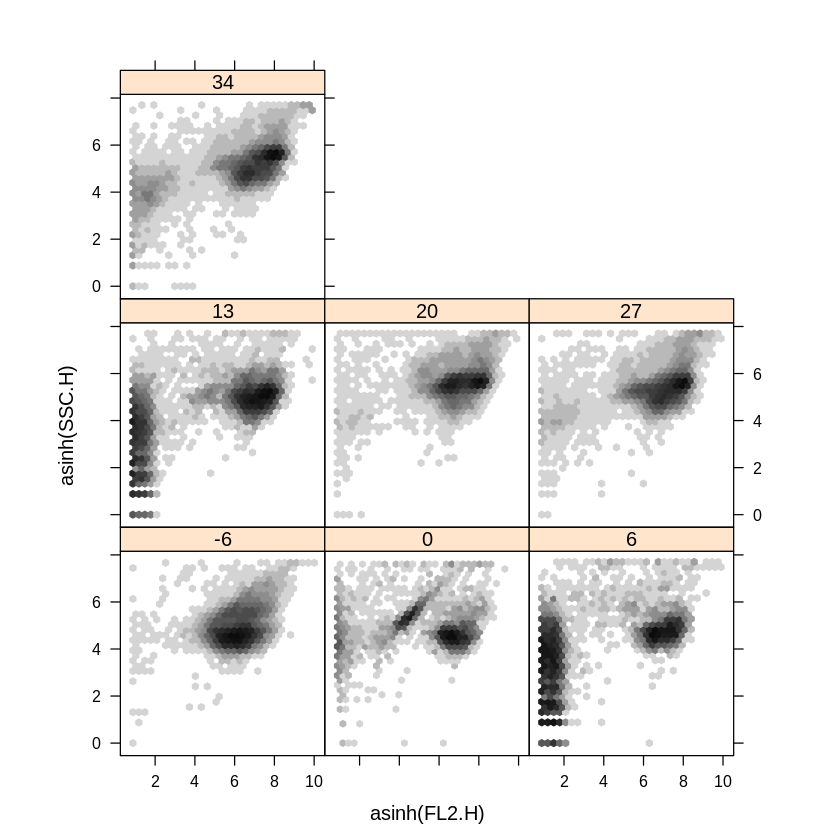

In [13]:
library("hexbin")

data(gvhd10, package = "latticeExtra")

xyplot(asinh(SSC.H) ~ asinh(FL2.H) | Days, gvhd10, aspect = 1, 
       panel = panel.hexbinplot, .aspect.ratio = 1, trans = sqrt)

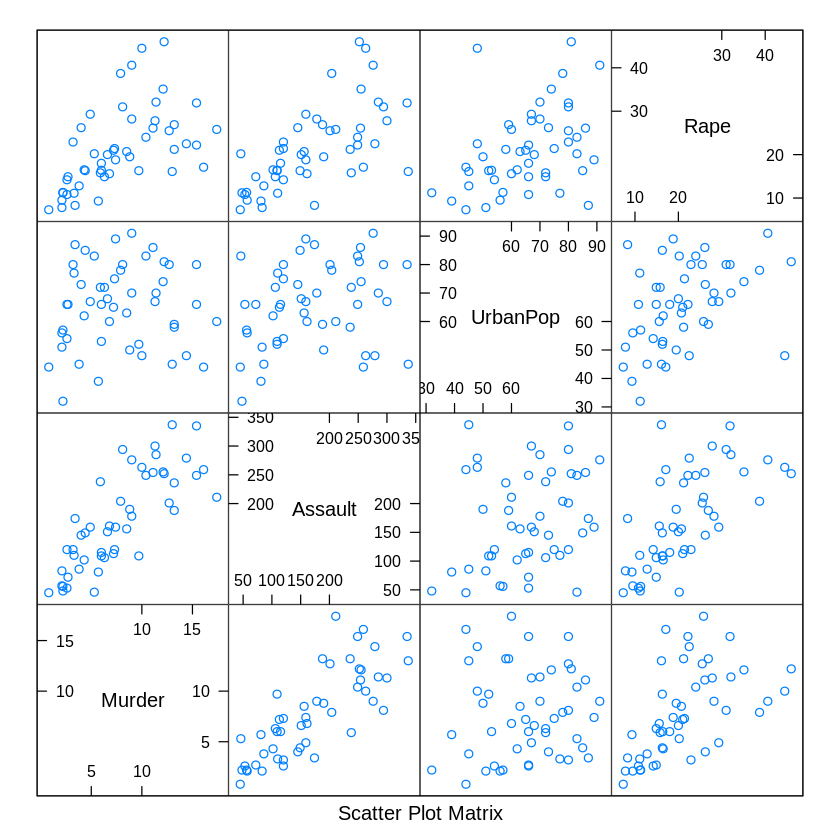

In [14]:
splom(USArrests)

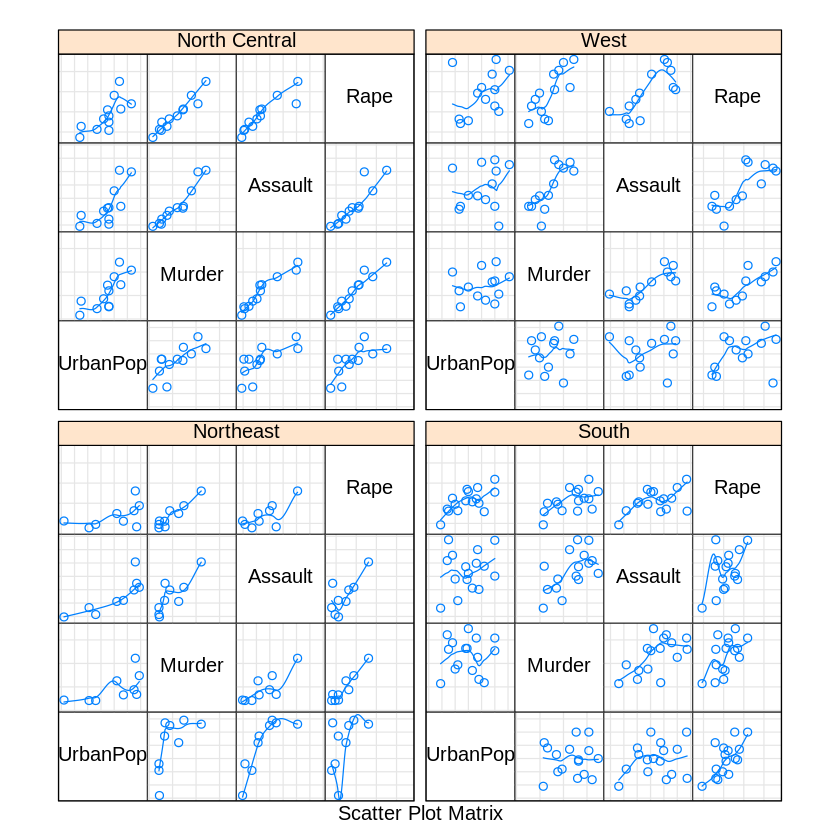

In [15]:
splom(~USArrests[c(3, 1, 2, 4)] | state.region, 
      pscales = 0, type = c("g", "p", "smooth"))

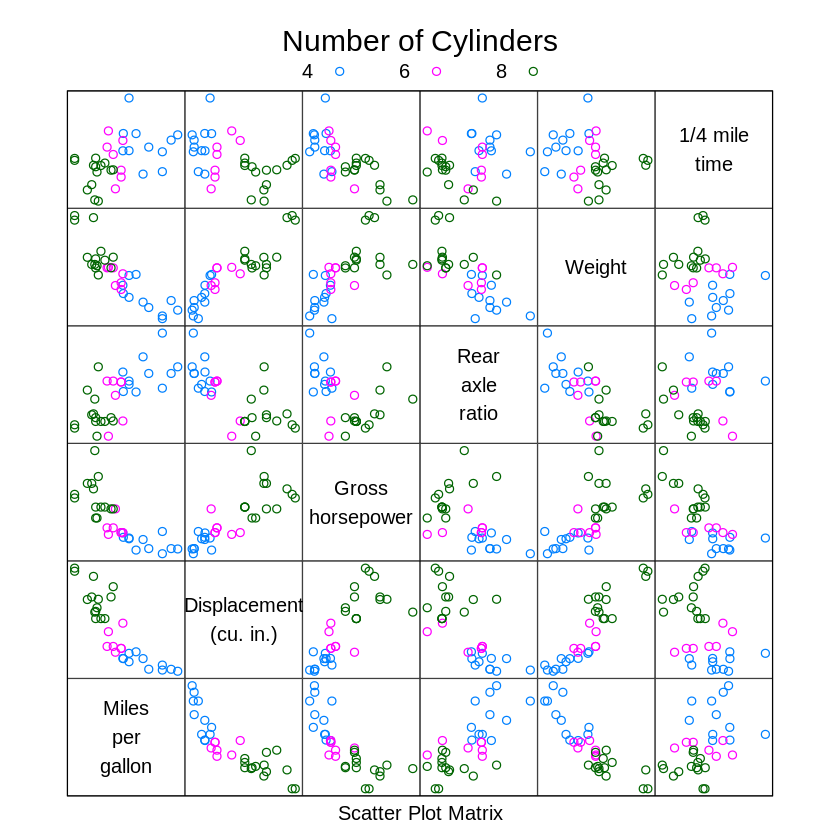

In [16]:
splom(~data.frame(mpg, disp, hp, drat, wt, qsec),
      data = mtcars, groups = cyl, pscales = 0, 
      varnames = c("Miles\nper\ngallon", "Displacement\n(cu. in.)",
                   "Gross\nhorsepower", "Rear\naxle\nratio", 
                   "Weight", "1/4 mile\ntime"),
      auto.key = list(columns = 3, title = "Number of Cylinders"))

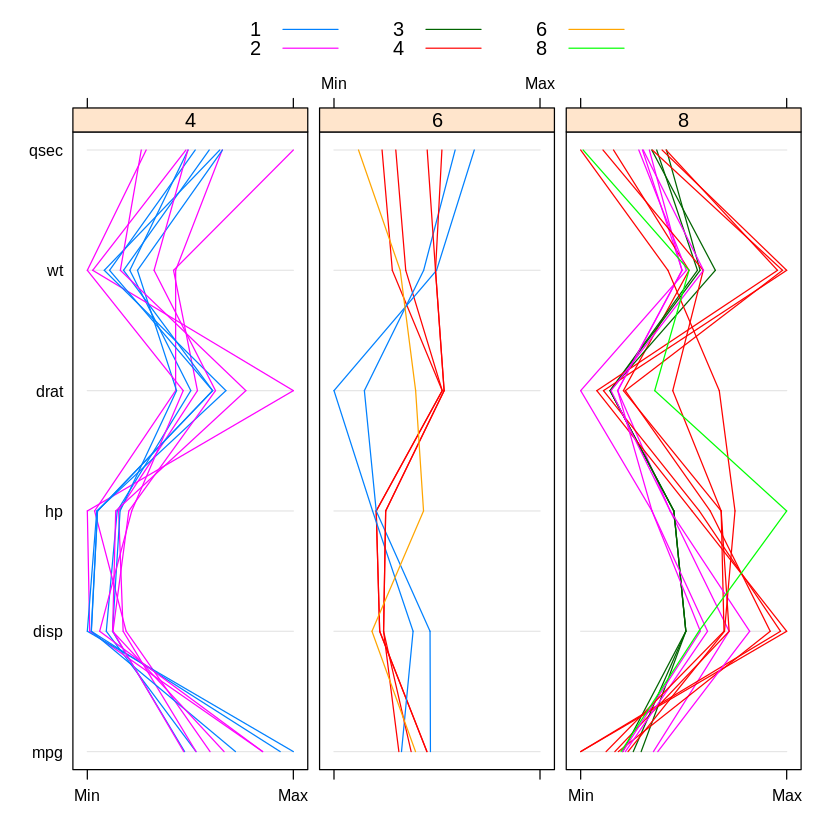

In [17]:
parallelplot(~mtcars[c(1, 3, 4, 5, 6, 7)] | factor(cyl), 
         mtcars, groups = carb, 
         key = simpleKey(levels(factor(mtcars$carb)), points = FALSE, 
                         lines = TRUE, space = "top", columns = 3), 
         layout = c(3, 1))

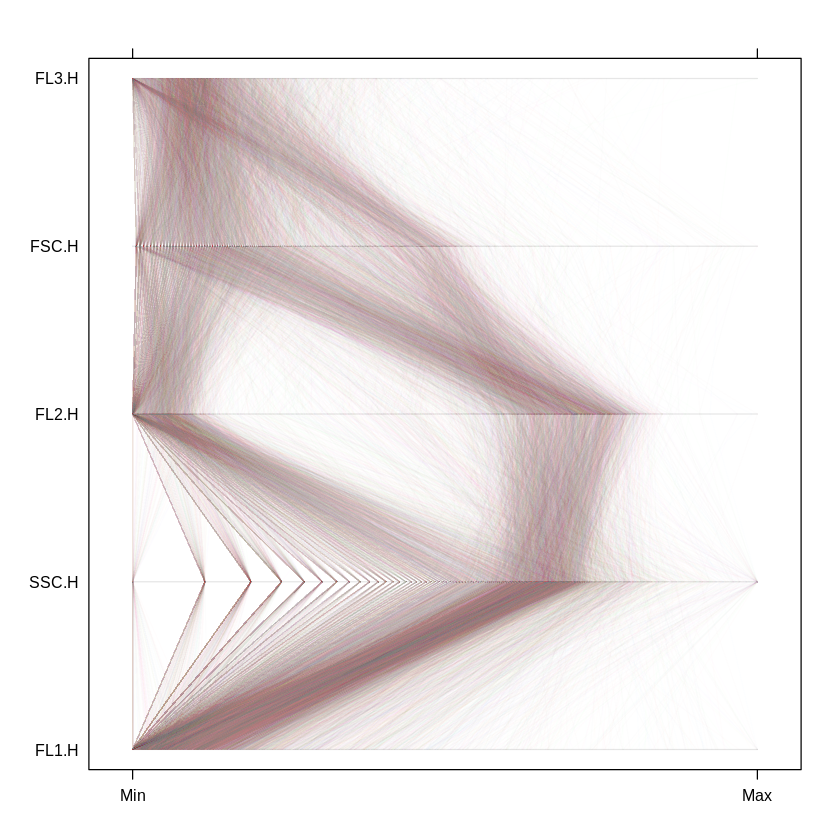

In [18]:
data(gvhd10, package = "latticeExtra")

parallelplot(~ asinh(gvhd10[c(3, 2, 4, 1, 5)]), data = gvhd10, 
         subset = Days == "13", alpha = 0.01, lty = 1)